## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude.
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

---

# Dependencies

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [140]:
import numpy as np
import pandas as pd
from scipy import spatial
import matplotlib.cm as cm
from google.colab import drive
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [141]:
%matplotlib inline
plt.style.use('ggplot')

<br>

---

# Functions

## <code><b>plot_similarity()</b></code>

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def plot_similarity(
        df,
        l,
        w,
        h=None,
        dimensions=None,
        distance_metric="cosine"
    ):
    # -------------------------------------------------------------------------
    """
    Plot similarity visualization based on cosine similarity.

    Parameters:
        df (DataFrame): A pandas DataFrame containing the data to be visualized.
        l (float): Length value used for similarity calculation.
        w (float): Width value used for similarity calculation.
        h (float, optional): Height value used for similarity calculation (only for 3D plots).
        dimensions (list of str, optional): A list of two or three column names to be used for the plot.
            Available dimension combinations:
            - For 2D plots: [['X', 'Y'], ['Y', 'Z'], ['X', 'Z']]
            - For 3D plots: [['X', 'Y', 'Z']]
        distance_metric (str, optional): The distance metric to be used for similarity calculation.
            Default is "cosine," which calculates cosine similarity.

    Returns:
        None

    Example usage:
        # Create a DataFrame (df) with the relevant data.
        # Set the desired l, w, and h values.
        # Specify dimensions for X and Y axes, Y and Z axes, or X and Z axes for 2D plots.
        # Specify dimensions for X, Y, and Z axes for 3D plots.
        # Call the function to visualize similarity.

        # For 2D plot:
        plot_similarity(df, l=5., w=5., dimensions=['X', 'Y'])
        plot_similarity(df, l=5., w=5., dimensions=['Y', 'Z'], h=5.0)

        # For 3D plot:
        plot_similarity(df, l=5., w=5., h=5., dimensions=['X', 'Y', 'Z'])
    """
    # -------------------------------------------------------------------------
    if not dimensions:
        raise ValueError("Dimensions must be specified.")
    # -------------------------------------------------------------------------
    if len(dimensions) == 2:
        if distance_metric == "cosine":
            similarity = cosine_similarity(
                  df[dimensions]
                , [[l, w]]
            )

            similarity = 1. - similarity

            fig = plt.figure(
                figsize=[10, 8]
            )

            axis_limit_x = [0, 10]
            axis_limit_y = [0, 10]

            ax = plt.gca()

            scatter = ax.scatter(
                  df[dimensions[0]]
                , df[dimensions[1]]
                , c = similarity[:, 0]
                , s = 20
            )

            ax.plot(
                  [0, l]
                , [0, w]
                , '--'
                , color='dimgray'
            )

            ax.set_xlabel(
                  dimensions[0]
                , size = 14
            )

            ax.set_ylabel(
                  dimensions[1]
                , size = 14
            )

            ax.set_xlim(
                axis_limit_x
            )

            ax.set_ylim(
                axis_limit_y
            )

            ax.set_title(
                'Cosine Similarity'
            )

            cb = plt.colorbar(
                scatter
            )

            cb.set_label(
                  f'Similarity with ({l}, {w})'
                , size = 14
            )

            plt.show()
    # -------------------------------------------------------------------------
    elif len(dimensions) == 3:
        if distance_metric == "cosine":
            similarity = cosine_similarity(
                df[dimensions],
                [[l, w, h]]
            )

            similarity = 1. - similarity

            fig = plt.figure(
                figsize=[10, 8]
            )

            axis_limit_x = [0, 10]
            axis_limit_y = [0, 10]
            axis_limit_z = [0, 10]

            ax = fig.add_subplot(
                  111
                , projection = '3d'
            )

            scatter = ax.scatter(
                  df[dimensions[0]]
                , df[dimensions[1]]
                , df[dimensions[2]]
                , c = similarity[:, 0]
                , s = 20
            )

            ax.plot(
                  [0, l]
                , [0, w]
                , [0, h]
                , '--'
                , color='dimgray'
            )

            ax.set_xlabel(
                  dimensions[0]
                , size = 14
            )

            ax.set_ylabel(
                  dimensions[1]
                , size = 14
            )

            ax.set_zlabel(
                  dimensions[2]
                , size = 14
            )

            ax.set_xlim(
                axis_limit_x
            )

            ax.set_ylim(
                axis_limit_y
            )

            ax.set_zlim(
                axis_limit_z
            )

            ax.set_title(
                'Cosine Similarity'
            )

            cb = plt.colorbar(
                scatter
            )
            cb.set_label(
                  f'Similarity with ({l}, {w}, {h})'
                , size = 14
            )

            plt.show()
    # -------------------------------------------------------------------------
    else:
        raise ValueError(
            "Invalid number of dimensions. Dimensions must be a list of two or three column names."
        )


## <code><b>convert_vector_to_dataframe_and_find_similarities()</b></code>

In [159]:
def convert_vector_to_dataframe_and_find_similarities(
      vectorizer
    , corpus
    , distance_metric
  ):
  # ---------------------------------------------------------------------------
  # Apply the "vectorizer" to the "corpus" to transform it into vectors
  X_train = vectorizer.fit_transform(
    corpus
  )
  # ---------------------------------------------------------------------------
  # Convert the "X_train" vector to a DataFrame
  df =  pd.DataFrame(
      X_train.toarray()
    , columns = vectorizer.get_feature_names_out()
  )
  # ---------------------------------------------------------------------------
  # Set custom index names
  df.index = [
        "Document 0"
      , "Document 1"
  ]
  # ---------------------------------------------------------------------------
  try:
    if distance_metric == "cosine":
      # Use the cosine similarity function to get measures of similarity for the
      # sentences or paragraphs in your original document
      similarity = cosine_similarity(
          X_train[0:1]
        , X_train
      )

  except:
    raise ValueError(f"Unsupported distance metric: {distance_metric}")
  # ---------------------------------------------------------------------------
  print(f"DataFrame:\n{df}")
  print("-"*49)
  print(f"Similarities:\n{similarity}")

<br>

---

# Load data

In [143]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/data/15.5. distance_dataset (1).csv'
df= pd.read_csv(FILE_PATH, index_col=None)
df = df.drop(columns=['Unnamed: 0'])
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


<br>

---

# Cosine Similarity

## Clusters and numeric matrices

* All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 * First, create a matrix from the dataframe. For xample, here, the 2D matrix  contains the <code><b>Y</b></code> and <code><b>Z</b></code> columns and the 3D matrix should contain the <code><b>X</b></code>,<code><b>Y</b></code>, and <code><b>Z</b></code> columns.

### 2D Matrix

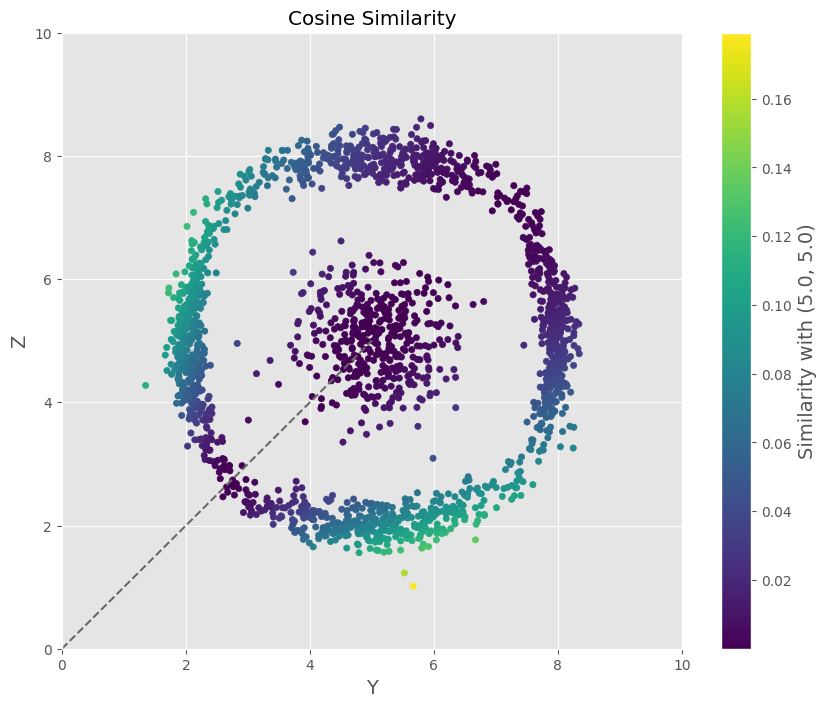

In [196]:
plot_similarity(
      df
    , l=5.
    , w=5.
    , h=5.
    , dimensions=['Y', 'Z']
)

### 3D Matrix

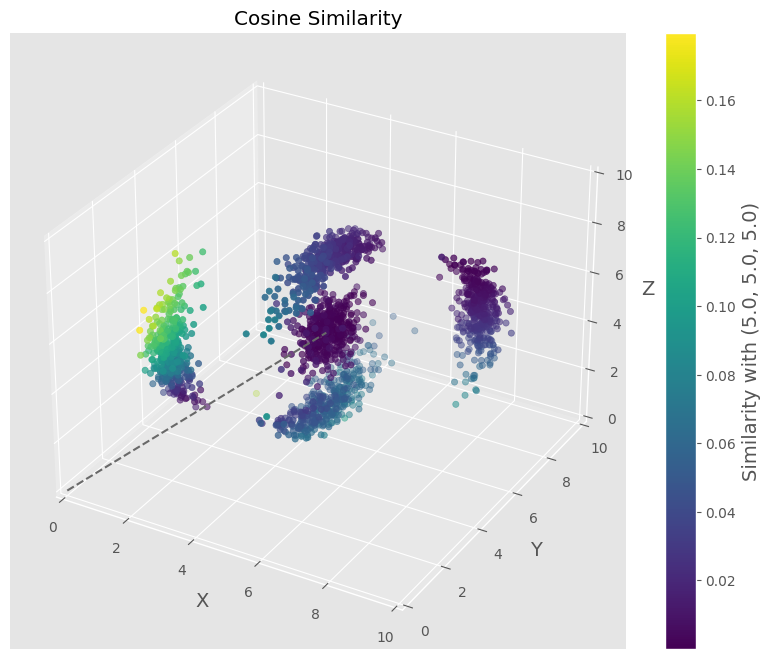

In [197]:
plot_similarity(
      df
    , l=5.
    , w=5.
    , h=5.
    , dimensions=['X', 'Y', 'Z']
)

<br>

---

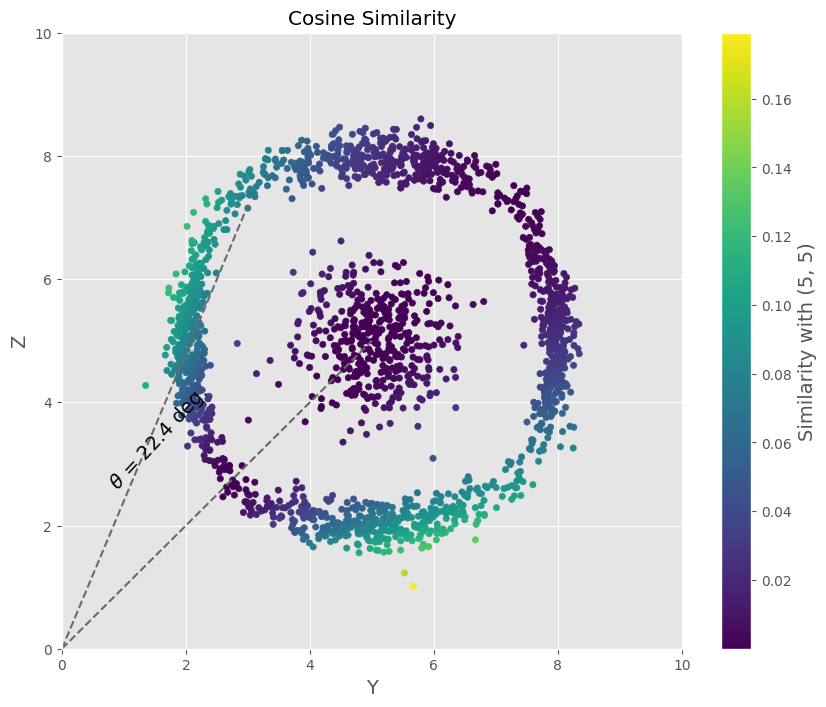

In [152]:
figCosine = plt.figure(
    figsize=[10, 8]
)

axis_limit_x = [0, 10]
axis_limit_y = [0, 10]
# -----------------------------------------------------------------------------
plt.scatter(
      df.Y
    , df.Z
    , c = simCosine2D[:, 0]
    , s = 20
)

plt.plot(
      [0, 5.0]
    , [0, 5.0]
    , '--'
    , color='dimgray'
)

plt.plot(
      [0, 3.0]
    , [0, 7.2]
    , '--'
    , color='dimgray'
)
# -----------------------------------------------------------------------------
plt.text(
      0.7
    , 2.6
    , r'$\theta$ = 22.4 deg.'
    , rotation=47
    , size=14
)

plt.ylim(axis_limit_x)
plt.xlim(axis_limit_y)

plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)

plt.title(
    'Cosine Similarity'
)
# -----------------------------------------------------------------------------
cb = plt.colorbar()

cb.set_label(
      'Similarity with (5, 5)'
    , size = 14
)

----

## Cosine Similarity with text data

This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs.
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1.

Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

 **<font color='teal'> Combine the documents into a corpus.</font>**

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

### <b>Corpus 1</b>

In [154]:
doc1 = "Starbucks Coffee"
doc2 = "Essence of Coffee"

corpus1 = [doc1, doc2]

#### I. <code><b>CountVectorizer()</b></code>

In [160]:
convert_vector_to_dataframe_and_find_similarities(
      CountVectorizer()
    , corpus = corpus1
    , distance_metric = "cosine"
)

DataFrame:
            coffee  essence  of  starbucks
Document 0       1        0   0          1
Document 1       1        1   1          0
-------------------------------------------------
Similarities:
[[1.         0.40824829]]


#### II. <code><b>TfidfVectorizer()</b></code>

In [161]:
convert_vector_to_dataframe_and_find_similarities(
      TfidfVectorizer()
    , corpus = corpus1
    , distance_metric = "cosine"
)

DataFrame:
              coffee   essence        of  starbucks
Document 0  0.579739  0.000000  0.000000   0.814802
Document 1  0.449436  0.631667  0.631667   0.000000
-------------------------------------------------
Similarities:
[[1.         0.26055567]]


### <b>Corpus 2</b>

In [157]:
doc1 = "Today I will go to Target"
doc2 = "Tomorrow I will go to Kroger"

corpus2 = [
      doc1
    , doc2
]

#### I. <code><b>CountVectorizer()</b></code>

In [162]:
convert_vector_to_dataframe_and_find_similarities(
      CountVectorizer()
    , corpus = corpus2
    , distance_metric = "cosine"
)

DataFrame:
            go  kroger  target  to  today  tomorrow  will
Document 0   1       0       1   1      1         0     1
Document 1   1       1       0   1      0         1     1
-------------------------------------------------
Similarities:
[[1.  0.6]]


#### II. <code><b>TfidfVectorizer()</b></code>

In [163]:
convert_vector_to_dataframe_and_find_similarities(
      TfidfVectorizer()
    , corpus = corpus2
    , distance_metric = "cosine"
)

DataFrame:
                  go    kroger    target        to     today  tomorrow  \
Document 0  0.379303  0.000000  0.533098  0.379303  0.533098  0.000000   
Document 1  0.379303  0.533098  0.000000  0.379303  0.000000  0.533098   

                will  
Document 0  0.379303  
Document 1  0.379303  
-------------------------------------------------
Similarities:
[[1.         0.43161342]]
